In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Raw data
rough_truth = np.array([305, 406, 610, 914, 1219, 1524, 1829, 2134, 2438, 2743, 3048, 3353, 3658, 3962, 4267])
sensor_data = {
    "Foam Board": np.array([
        363, 425, 624, 926, 1221, 1532, 1822, 2112,
        2505, 2792, 3055, 3378, 3680, 4010, 0
    ]),
    "Cardboard": np.array([
        361, 397, 600, 910, 1216, 1515, 1820, 2118,
        2417, 2722, 3107, 3394, 3690, 0, 0
    ]),
    "Whiteboard": np.array([
        360, 426, 630, 933, 1236, 1534, 1844, 2142,
        2449, 2754, 3048, 3362, 3666, 3965, 4258
    ]),
    "Metal": np.array([
        361, 409, 607, 913, 1218, 1524, 1830, 2131,
        2434, 2738, 3034, 3359, 3650, 3940, 4254
    ]),
    "Wood": np.array([
        358, 425, 626, 923, 1244, 1538, 1838, 2148,
        2452, 2756, 3045, 0, 0, 0, 0
    ])
}

colors = {
    "Foam Board": "#1f77b4",
    "Cardboard": "#ff7f0e",
    "Whiteboard": "#2ca02c",
    "Metal": "#d62728",
    "Wood": "#9467bd"
}

### Expected values vs. Ground truth

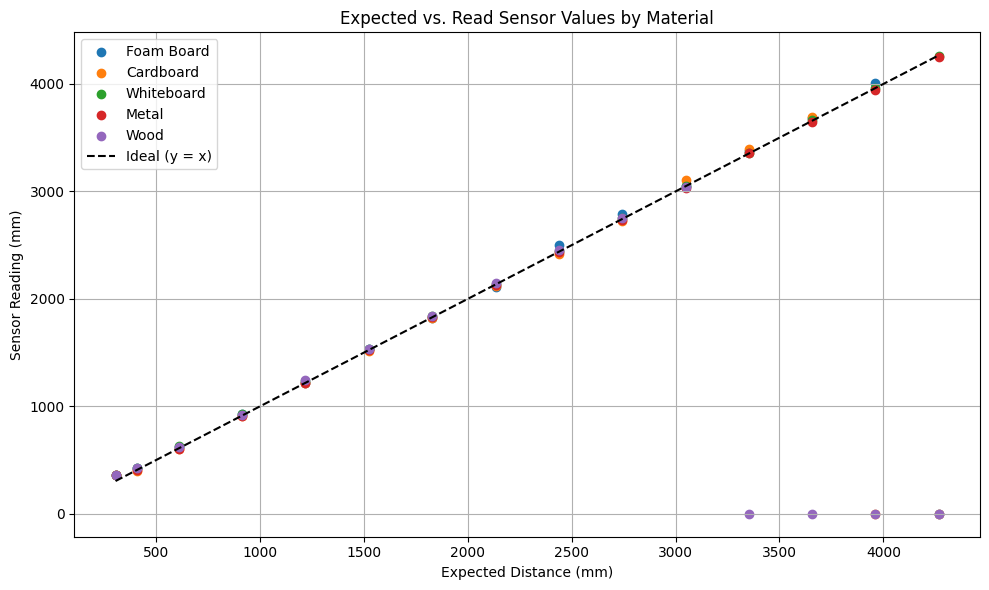

In [6]:
# All at once
plt.figure(figsize=(10, 6))

for material, readings in sensor_data.items():
    n = min(len(readings), len(rough_truth))
    plt.scatter(rough_truth[:n], readings[:n], label=material)

# Identity line (ideal)
plt.plot(rough_truth, rough_truth, 'k--', label='Ideal (y = x)')

plt.xlabel("Expected Distance (mm)")
plt.ylabel("Sensor Reading (mm)")
plt.title("Expected vs. Read Sensor Values by Material")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

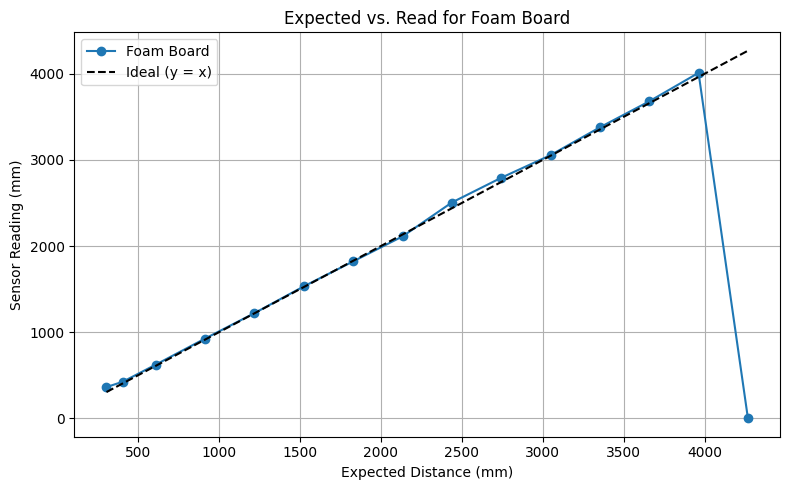

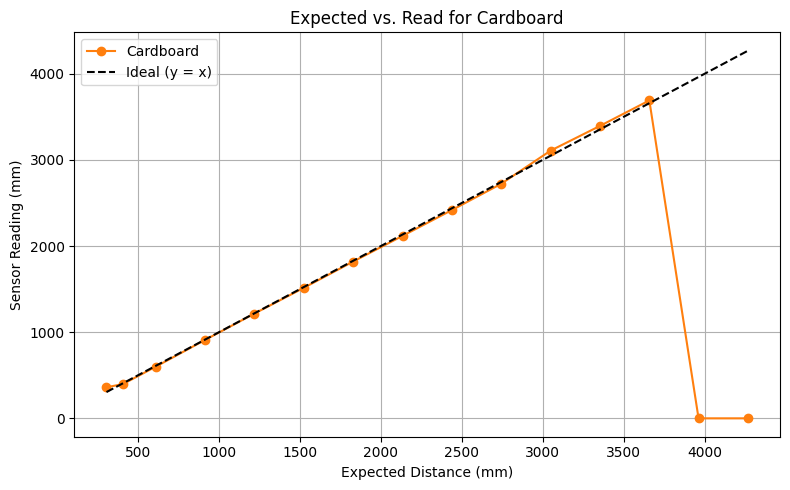

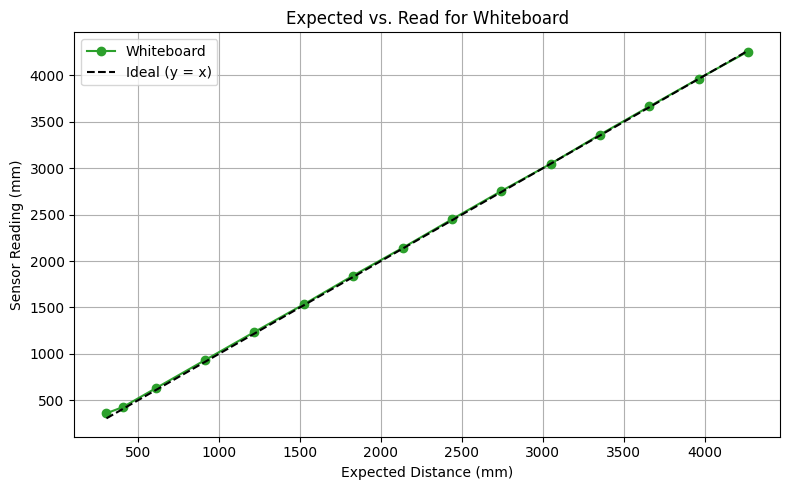

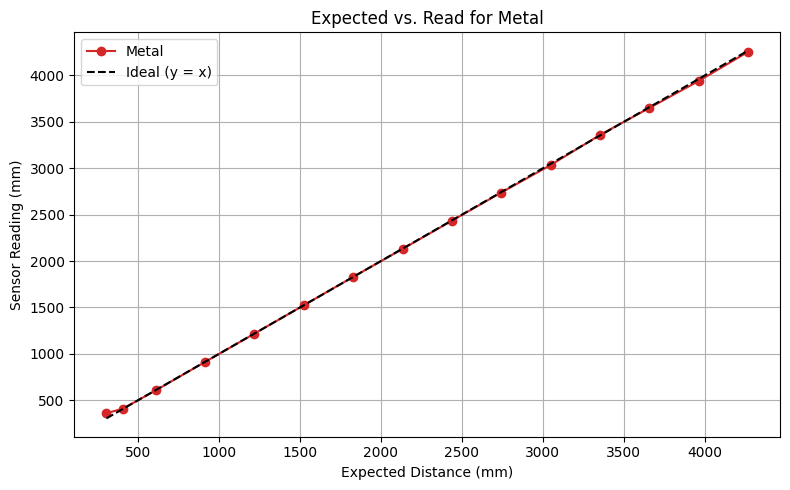

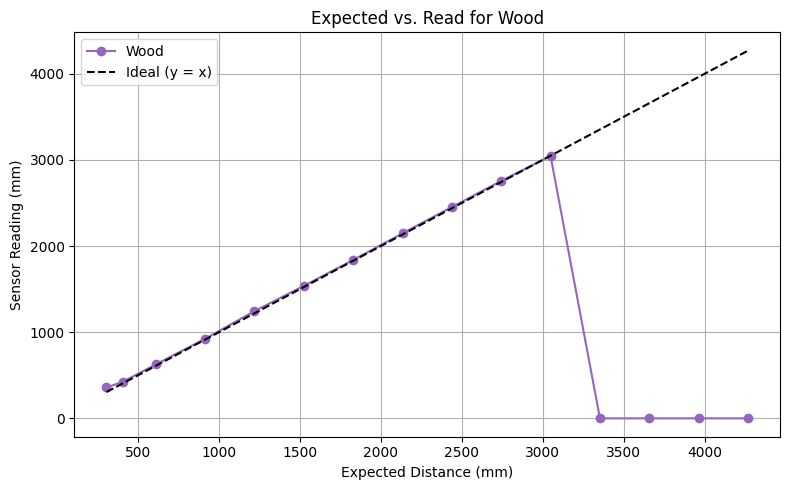

In [14]:
for material, readings in sensor_data.items():
    n = min(len(readings), len(rough_truth))
    expected = rough_truth[:n]
    actual = readings[:n]

    plt.figure(figsize=(8, 5))
    plt.plot(expected, actual, marker='o', linestyle='-', label=material, color=colors[material])
    plt.plot(expected, expected, 'k--', label='Ideal (y = x)')

    plt.xlabel("Expected Distance (mm)")
    plt.ylabel("Sensor Reading (mm)")
    plt.title(f"Expected vs. Read for {material}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Percent Error across distance

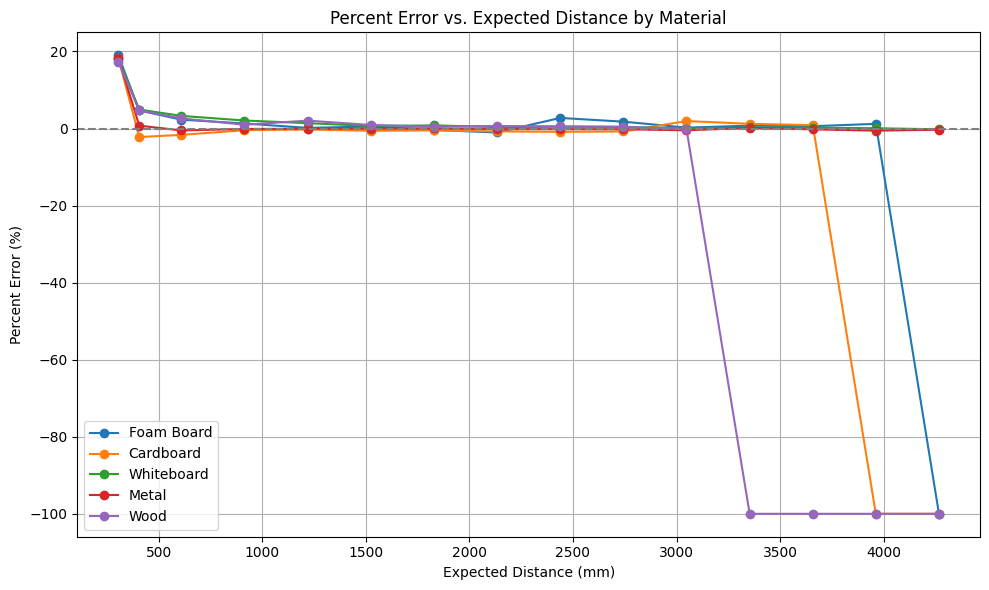

In [3]:
plt.figure(figsize=(10, 6))

for material, readings in sensor_data.items():
    n = min(len(readings), len(rough_truth))
    expected = rough_truth[:n]
    actual = readings[:n]
    percent_error = 100 * (actual - expected) / expected
    plt.plot(expected, percent_error, marker='o', label=material)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Expected Distance (mm)")
plt.ylabel("Percent Error (%)")
plt.title("Percent Error vs. Expected Distance by Material")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


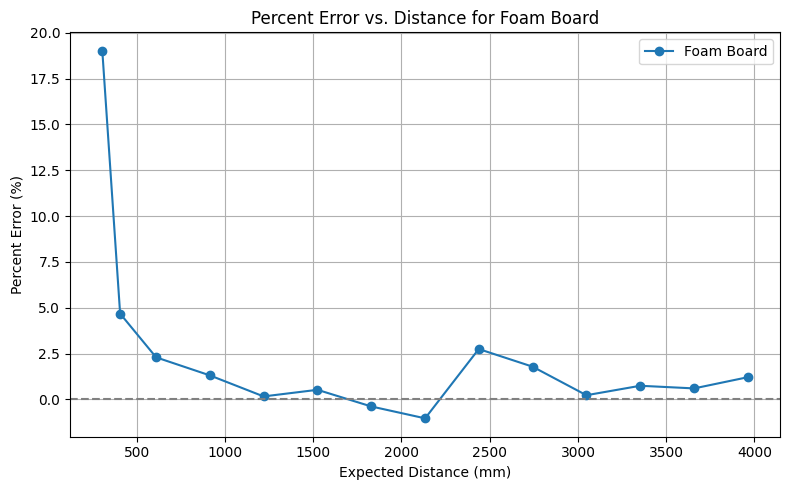

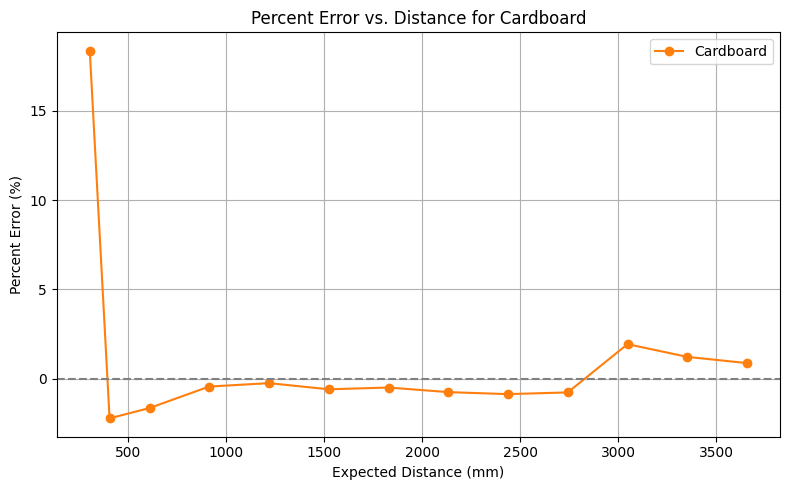

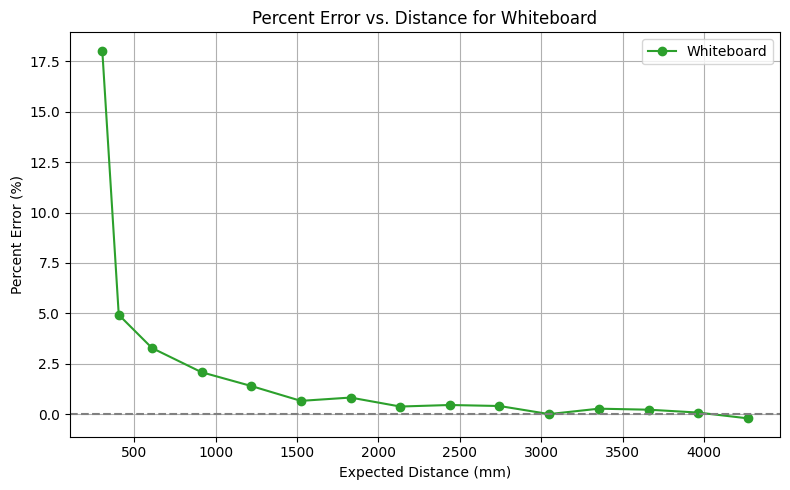

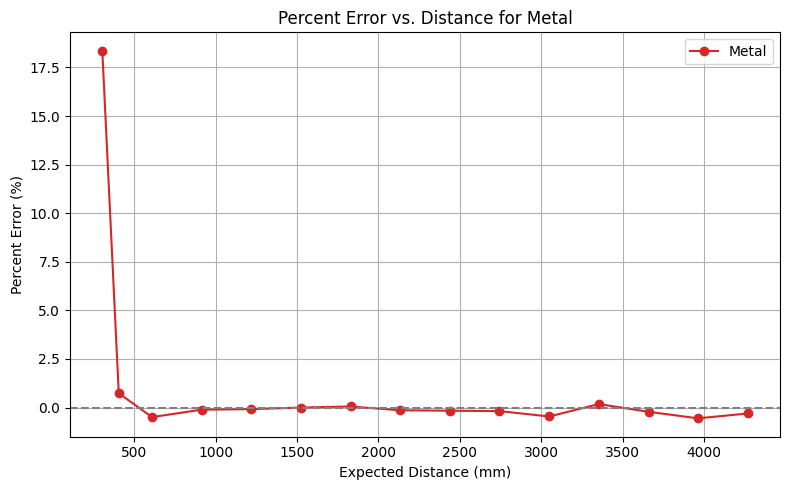

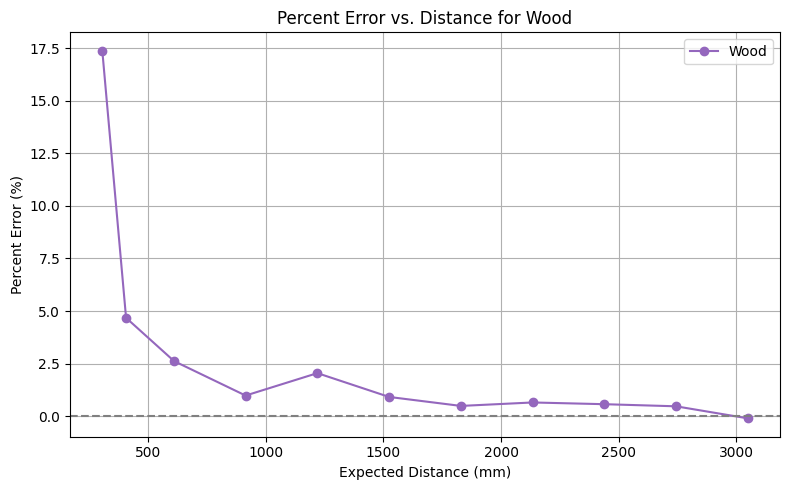

In [15]:
for material, readings in sensor_data.items():
    n = min(len(readings), len(rough_truth))
    expected = rough_truth[:n]
    actual = readings[:n]

    # Filter out invalid (0) readings
    mask = actual > 0
    expected_filtered = expected[mask]
    actual_filtered = actual[mask]
    percent_error = 100 * (actual_filtered - expected_filtered) / expected_filtered

    plt.figure(figsize=(8, 5))
    plt.plot(expected_filtered, percent_error, marker='o', linestyle='-', color=colors[material], label=material)
    plt.axhline(0, color='gray', linestyle='--')

    plt.xlabel("Expected Distance (mm)")
    plt.ylabel("Percent Error (%)")
    plt.title(f"Percent Error vs. Distance for {material}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
